In [1]:
import pandas as pd
import numpy as np

dataFrame = pd.read_csv("sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv")

print("number of missing entries per feature\n")
print(dataFrame.isnull().sum())

print("number of entries per feature\n")
print(dataFrame.notnull().sum())



number of missing entries per feature

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64
number of entries per feature

timestamp       56570
mac             56570
boardtype       56570
boardid         56570
temp_max        56570
temp_min        56570
temp_avg        56570
light_max       56570
light_min       56570
light_avg       56570
humidity_min    56570
humidity_max    56570
humidity_avg    56570
model           56570
latitude        56570
longitude       56570
elevation       34975
location        56570
rowid           56570
Position            0
geolocation    

2) Fill in the missing entries. For filling any feature, you can use either the mean or median value of the feature values from observed entries. Explain the reason behind your choice and print replacement value of each feature.

In [6]:
dataFrame['elevation'].fillna(dataFrame['elevation'].mean(), inplace=True)

print("Replacement Value for elevation=",dataFrame['elevation'].mean())

print("number of missing entries per feature\n")
print(dataFrame.isnull().sum())

print("number of entries per feature\n")
print(dataFrame.notnull().sum())


Replacement Value for elevation= 12.973809578270194
number of missing entries per feature

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation           0
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64
number of entries per feature

timestamp       56570
mac             56570
boardtype       56570
boardid         56570
temp_max        56570
temp_min        56570
temp_avg        56570
light_max       56570
light_min       56570
light_avg       56570
humidity_min    56570
humidity_max    56570
humidity_avg    56570
model           56570
latitude        56570
longitude       56570
elevation       56570
location        56570
rowid  

There are 2 parameters with missing entries. elevation and Position. With elevation, I decided to use mean, as the values are n ort really skewed, and mean seems like a good option in this data measure. The other value that has missing entries is Position, but with position, we have no entries, making it impossible for us to use either mean or median, as there is no value at all for the frame. I would remove that attribute from the frame, unless we plan to use that in the future to infer calculated values.

3) Encode the categorical variable  "location" using an appropriate encoding approach and display the encoded values. Justify your selection of encoding approach.  Save the modified data into a csv file. Upload this new file with your submission in OnTrack.

In [1]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(dataFrame["location"])

dataFrame["integer location"] = integer_encoded
dataFrame.to_csv("marcelo_week2.csv",index=None)


ModuleNotFoundError: No module named 'sklearn'

4) Apply the min-max scaling on features "[boardtype, boardid ,temp_max, temp_min, temp_avg,light_max, light_min,light_avg, humidity_min, humidity_max, humidity_avg]" . Plot distribution of first six features before and after scaling. Is there any difference? Please explain.

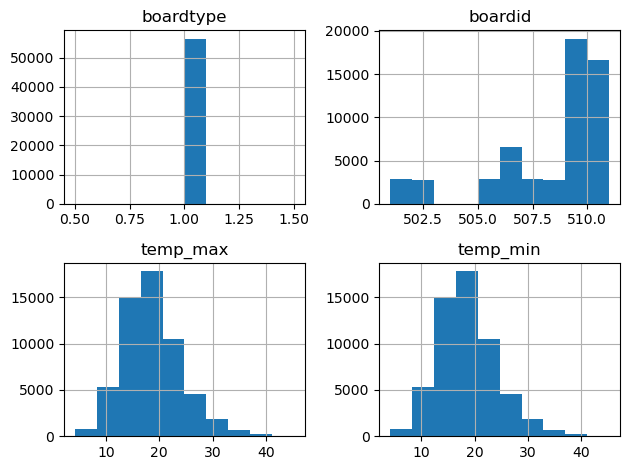

-----------------------AFTER MIN_MAX---------------------------------------


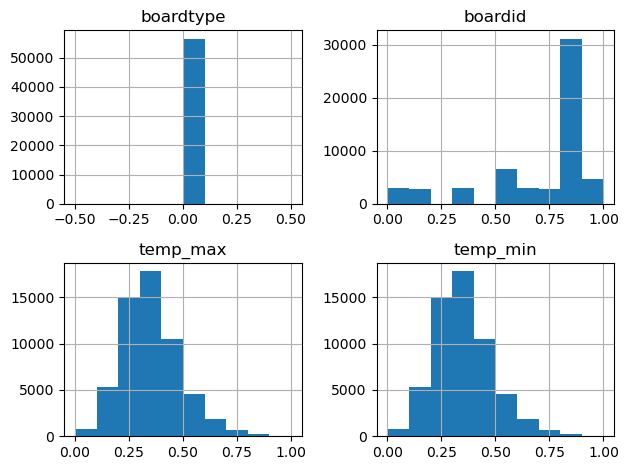

In [27]:
from matplotlib import pyplot as plot
from sklearn.preprocessing import MinMaxScaler
columns =["boardtype","boardid", "temp_max", "temp_min", "temp_avg","light_max", "light_min","light_avg", "humidity_min", "humidity_max", "humidity_avg"]


dataFrame.iloc[:, :6].hist()
plot.tight_layout()
plot.show()

print ("-----------------------AFTER MIN_MAX---------------------------------------")

scaler = MinMaxScaler()
scaler.fit(dataFrame[columns])
scaledDataFrame =  dataFrame.copy()
scaledDataFrame[columns] =   scaler.transform(scaledDataFrame[columns])
scaledDataFrame.iloc[:, :6].hist()
plot.tight_layout()
plot.show()


Min-Max scaling generates a relative comparison between values by scaling the range of each value from 0 to 1. This is meaningless for identification values such as boardtype and boardid, which represent the model and the id of the originator of the entry. However, it can be useful for visualizing the data distribution of temperature values independent of the exact values. This can be helpful if we want to have a better understanding of the relative relationship between the distribution.